#주제
The Kaggle Global Superstore 데이터분석  
질문: The Kaggle Global Superstore의 판매율을 증가시키기 위해 무엇을 해야하는가?

##데이터셋
데이터 셋 : superstore.csv  
글로벌 슈퍼스토어의 판매 및 주문에 대한 정보를 담고 있다.  
https://www.kaggle.com/datasets/fatihilhan/global-superstore-dataset/data  

In [1]:
#필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#데이터 읽어와서 확인하기
data=pd.read_csv('/content/superstore.csv')
data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


Ship.Date(배송)와 Order.Date(주문)을 datetime형으로 변경한 뒤 둘의 차를 구하면 주문에서 배송까지 걸린 시간을 알 수 있다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

记录数 열은 알 수 없거나 지정되지 않은 열이다. 불필요하므로 삭제를 진행한다.  
수치형 데이터는 Discount, Profit, Quantity, Row.ID, Sales, Shipping.Cost, Year, weeknum 열이고, 나머지 열은 object형 데이터이다.

In [4]:
#记录数열 삭제
df=data.drop('记录数', axis=1)

In [5]:
#datetime으로 형 변환하기:'Order.Date','Ship.Date'
df['Order.Date']=pd.to_datetime(df['Order.Date'])
df['Ship.Date']=pd.to_datetime(df['Ship.Date'])

In [6]:
df['Order.Date']

0       2011-01-07
1       2011-01-21
2       2011-08-05
3       2011-08-05
4       2011-09-29
           ...    
51285   2014-12-03
51286   2014-12-03
51287   2014-12-18
51288   2014-12-25
51289   2014-12-26
Name: Order.Date, Length: 51290, dtype: datetime64[ns]

In [7]:
df['Ship.Date']

0       2011-01-09
1       2011-01-26
2       2011-08-09
3       2011-08-09
4       2011-10-03
           ...    
51285   2014-12-04
51286   2014-12-04
51287   2014-12-21
51288   2014-12-26
51289   2014-12-30
Name: Ship.Date, Length: 51290, dtype: datetime64[ns]

In [8]:
df['waitingDay']=df['Ship.Date'].dt.dayofyear-df['Order.Date'].dt.dayofyear
df['waitingDay']

0        2
1        5
2        4
3        4
4        4
        ..
51285    1
51286    1
51287    3
51288    1
51289    4
Name: waitingDay, Length: 51290, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   Order.Date      51290 non-null  datetime64[ns]
 8   Order.ID        51290 non-null  object        
 9   Order.Priority  51290 non-null  object        
 10  Product.ID      51290 non-null  object        
 11  Product.Name    51290 non-null  object        
 12  Profit          51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Region          51290 non-null  object        
 15  Ro

##결측치 확인

In [10]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
waitingDay        0
dtype: int64

##이상치 확인

In [11]:
#통계값을 활용하여 이상치 확인
df.describe()

,Discount,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum,waitingDay
count,51290.000000,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112,-1.698343
std,0.212280,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795,45.087914
min,0.000000,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000,-365.000000
25%,0.000000,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000,3.000000
50%,0.000000,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000,4.000000
75%,0.200000,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000,5.000000
max,0.850000,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000,7.000000


In [12]:
#이상치 제거 - waitingDay가 음수인 데이터 존재
df=df[df['waitingDay']>=0]

In [13]:
df['waitingDay'].min()

0

In [14]:
df.nunique()

Category              3
City               3621
Country             147
Customer.ID        4867
Customer.Name       795
Discount             27
Market                7
Order.Date         1429
Order.ID          24664
Order.Priority        4
Product.ID        10272
Product.Name       3787
Profit            24292
Quantity             14
Region               13
Row.ID            50494
Sales              2237
Segment               3
Ship.Date          1454
Ship.Mode             4
Shipping.Cost     16732
State              1091
Sub.Category         17
Year                  4
Market2               6
weeknum              53
waitingDay            8
dtype: int64

범주형 데이터 중 Category, Market, Order.Priority, Region, Segment, Ship.Mode, Sub.Category, Market2는 종류가 적다.  
수치형 데이터 중 Profit, Sales, Shipping.Cost에는 다양한 수치가 들어있다.

##value counts 시각화

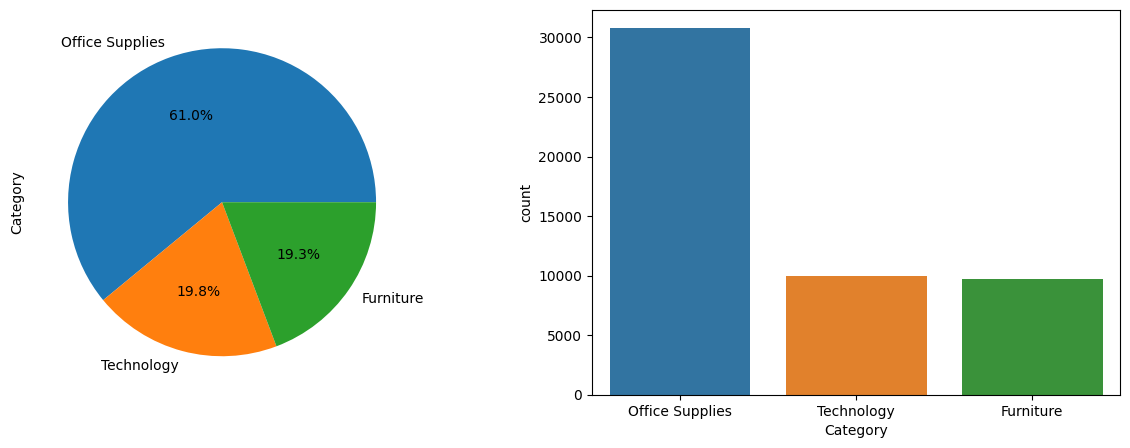

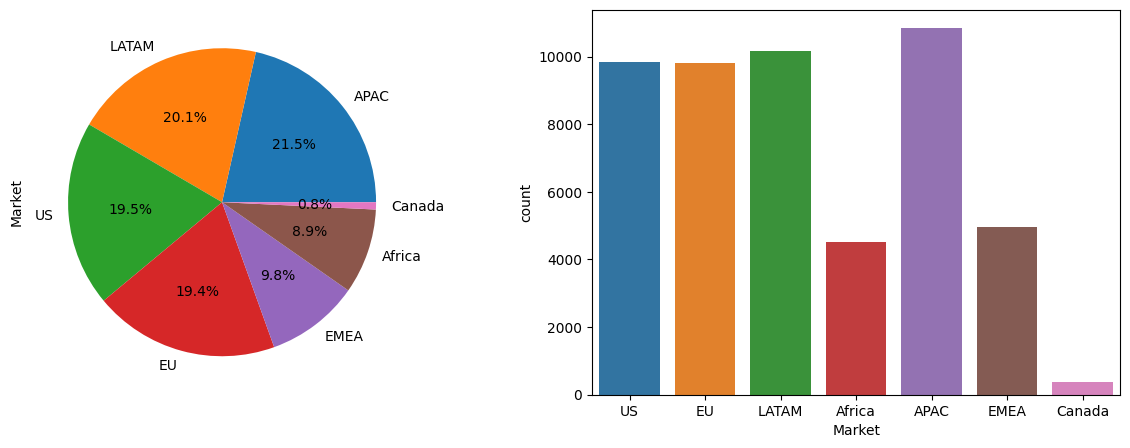

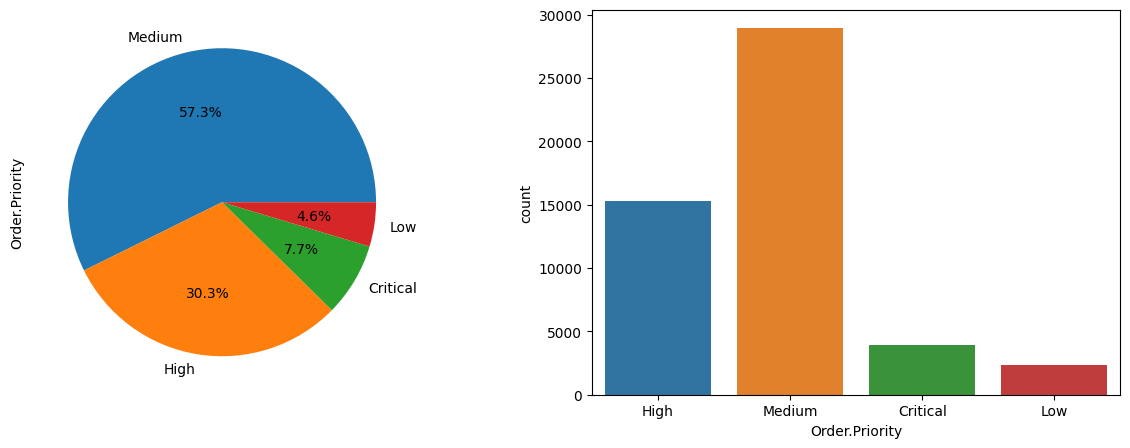

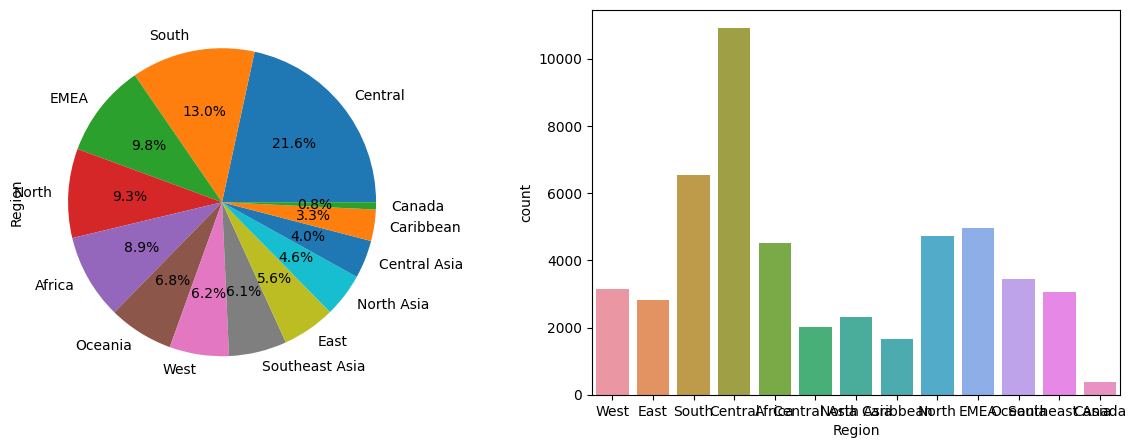

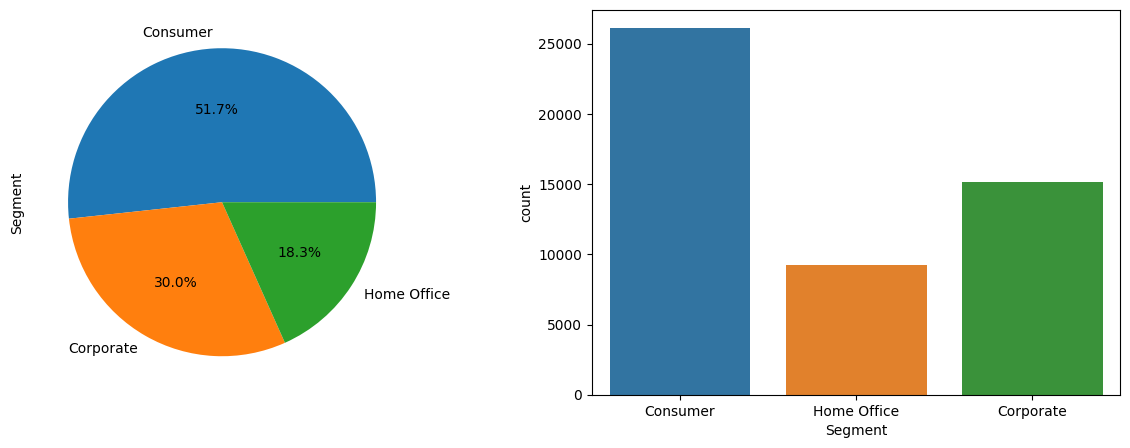

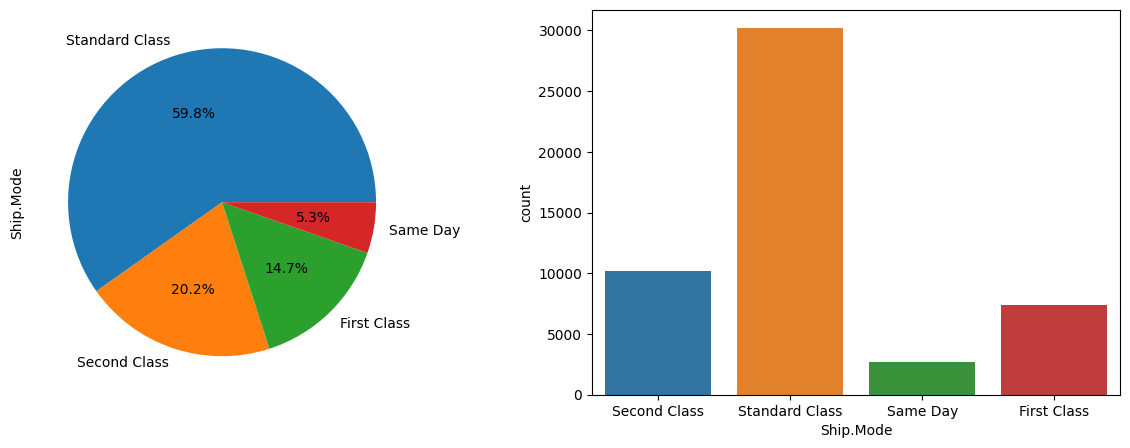

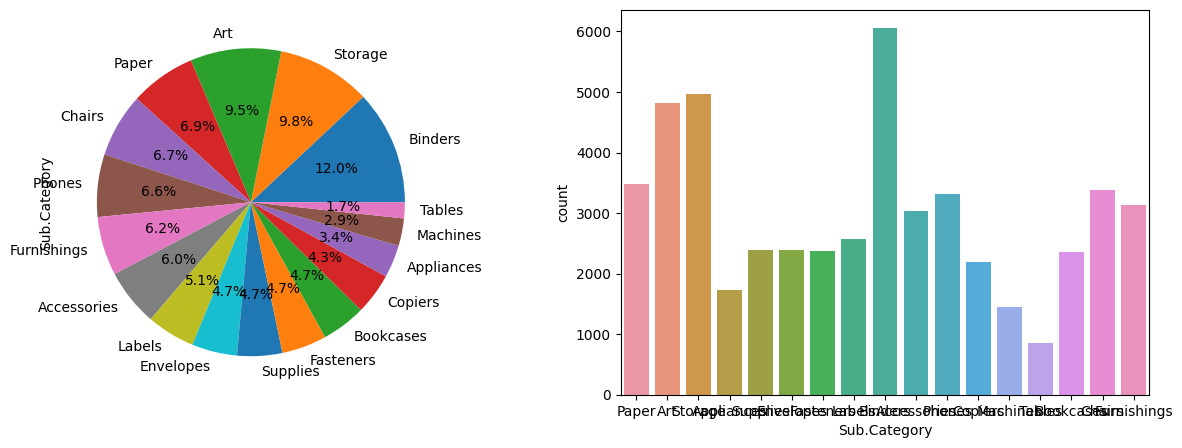

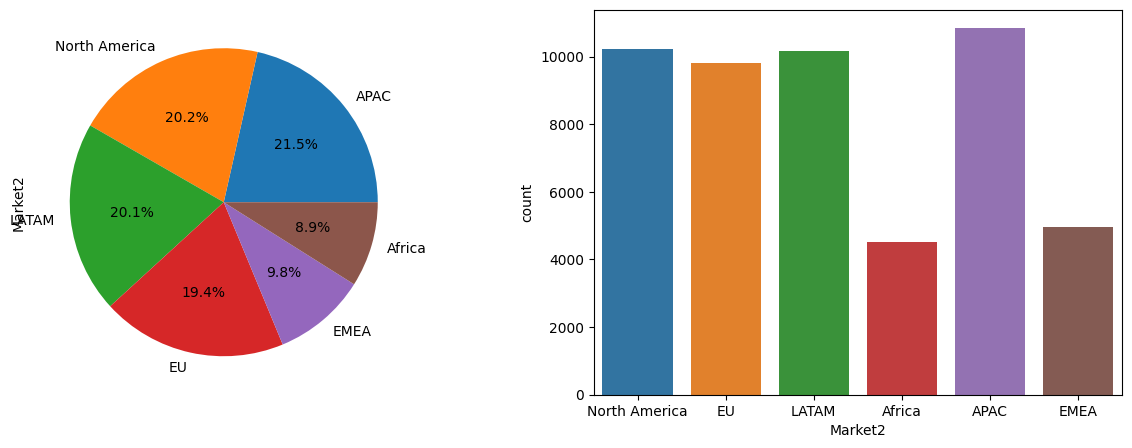

In [15]:
#범주형 데이터 value counts 시각화
def a(s):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[s].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(1,2,2)
    sns.countplot(x = df[s])
    df[s].value_counts()

#City, Country, Customer.ID, Customer.Name, Product.ID, Product.Name, State 제외
for i in ['Category',	'Market',	'Order.Priority',	'Region',	'Segment',	'Ship.Mode',	'Sub.Category',	'Market2']:
  a(i)

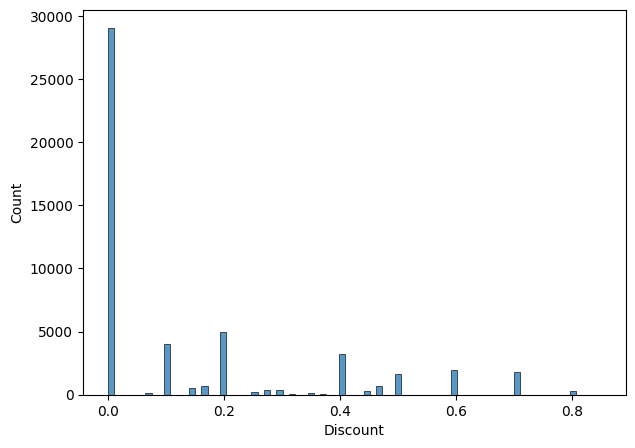

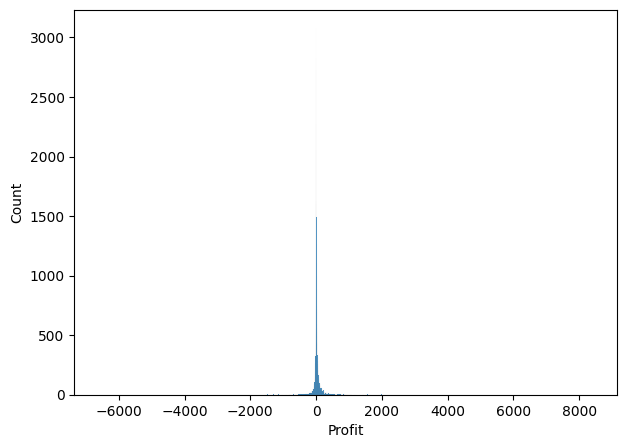

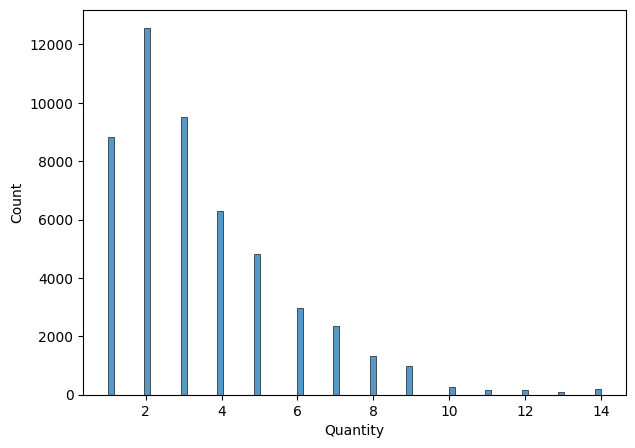

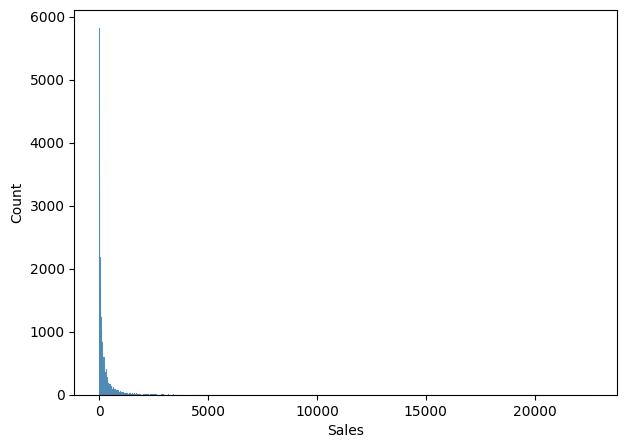

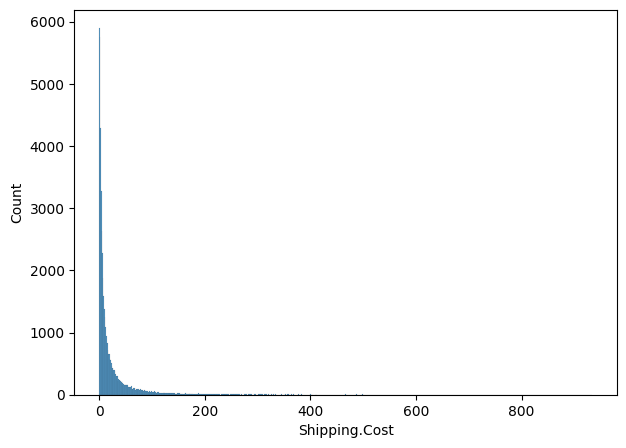

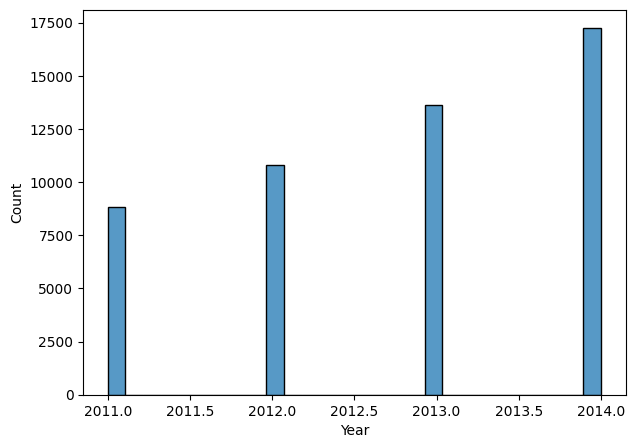

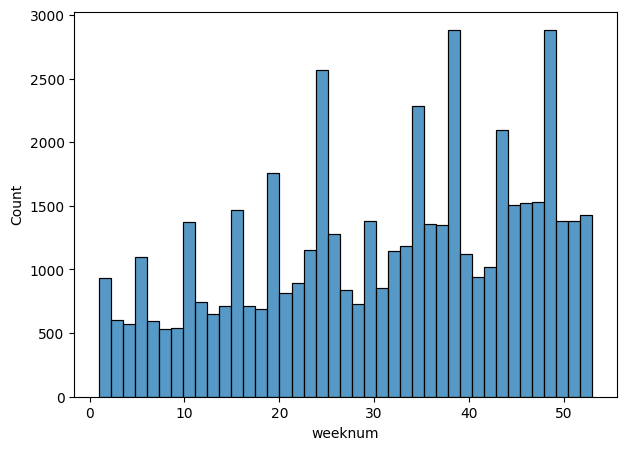

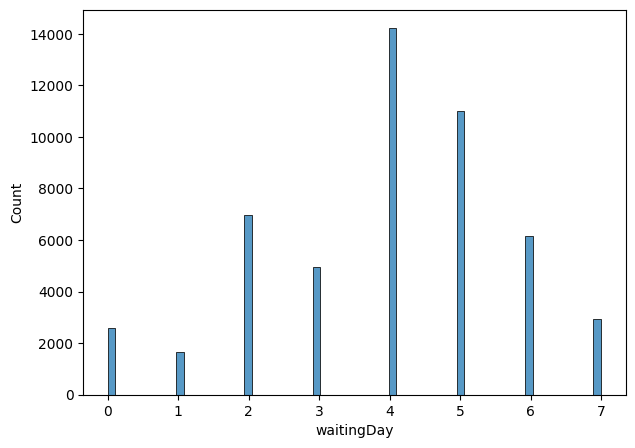

In [30]:
#수치형 데이터 value counts 시각화
def b(s):
  plt.figure(figsize=(7,5))
  sns.histplot(df[s])

for i in ['Discount',	'Profit',	'Quantity',	'Sales',	'Shipping.Cost',	'Year',	'weeknum',	'waitingDay']:
  b(i)

weeknum을 보면, 연초보다 연말에 주문을 많이 하는 경향이 있으며, 한 달 중 첫째주(카드사 실적 때문으로 추정)에 주문을 많이 한다는 흥미로운 사실을 알 수 있다.

##가설 설정

목표: 판매율 증가시키기  
소비자가 주문한 제품이 많을수록 판매율은 증가한다. 이와 관련된 속성은 Quantity이다.  
그래서 Quantity에 영향을 주는 속성을 찾아보기로 한다.

가설  
1. 할인율(Discount)이 높은 제품이 많이 판매될 것이다.
2. 주문의 우선순위(Order.Priority)가 높은 제품이 많이 판매될 것이다.
3. 주문에서 발생한 수익(Profit)이 낮은 제품이 많이 판매될 것이다.
4. 주문에 대한 배송 비용(Shipping.Cost)이 낮은 제품이 많이 판매될 것이다.
5. 배송 기간(watingDay)이 짧은 제품이 많이 판매될 것이다.  

위의 가설들은 특정 카테고리(Category, Sub.Category), 특정 지역(City, Country, State, Market, Region, Market2), 특정 고객(Segment), 특정 시간(Year, weeknum)별로 나눠서 분석할 수 있다.

### 1. Discount와 Quantity 관계 분석

<ipython-input-50-4417a63af0b7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='Discount',y='Quantity', ci=None) #barplot은 평균값이 계산된다


<Axes: xlabel='Discount', ylabel='Quantity'>

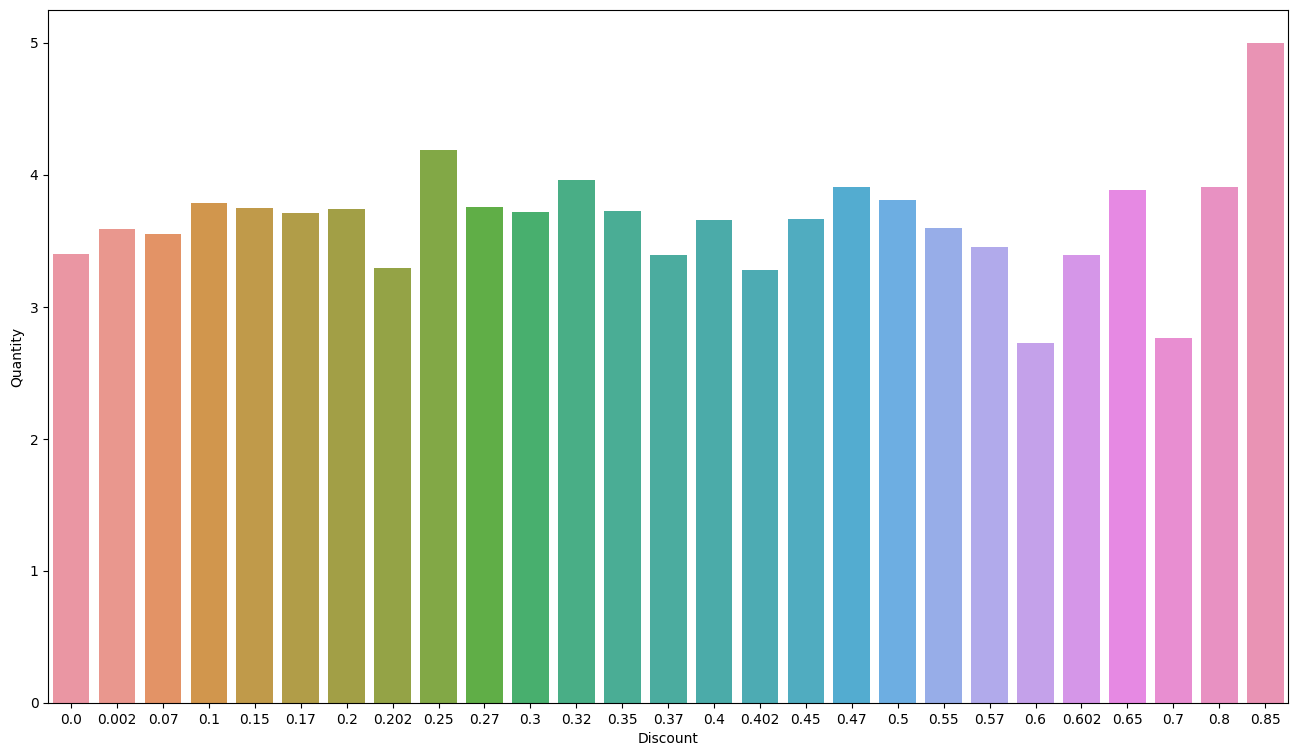

In [50]:
plt.figure(figsize=(16,9))
sns.barplot(data=df,x='Discount',y='Quantity', ci=None) #barplot은 평균값이 계산된다

<ipython-input-35-ac08cfb7322c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='Discount',y='Quantity', hue='Category', ci=None)


<Axes: xlabel='Discount', ylabel='Quantity'>

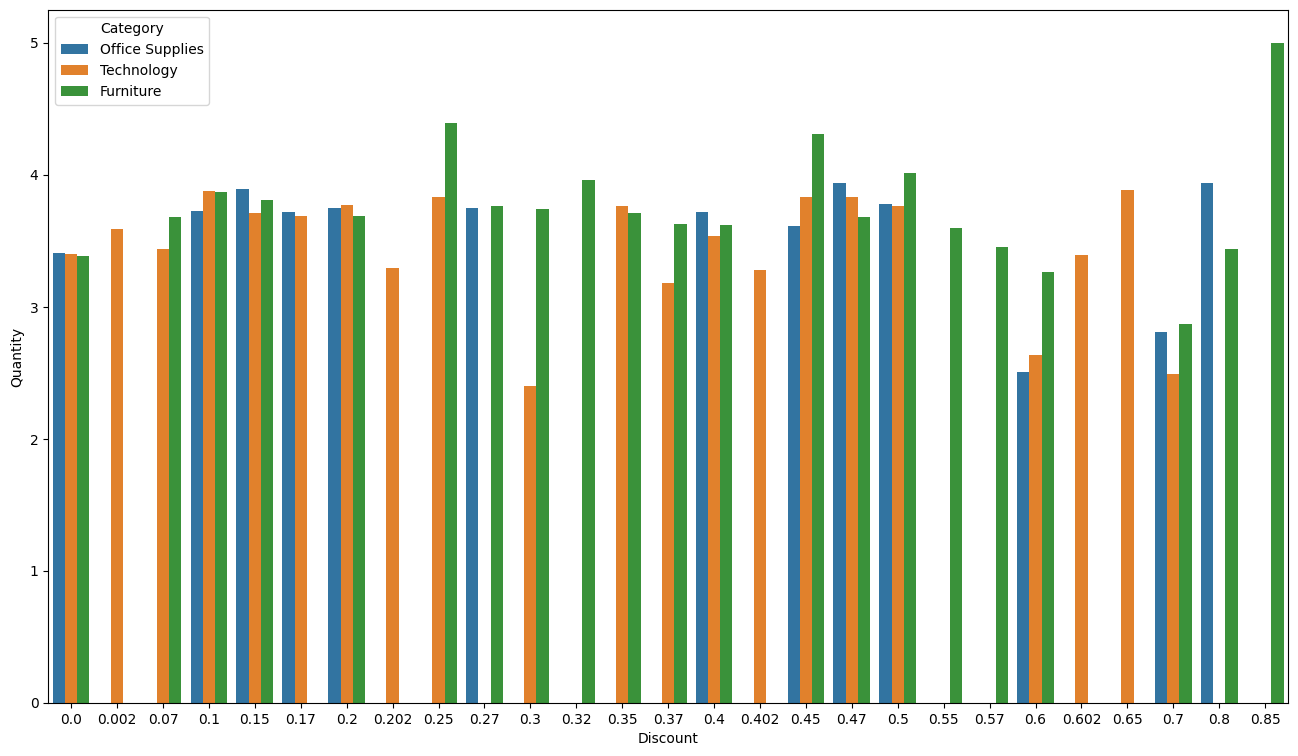

In [35]:
#특정 카테고리 별로 분석
plt.figure(figsize=(16,9))
sns.barplot(data=df,x='Discount',y='Quantity', hue='Category', ci=None)

<ipython-input-36-86932a270a8d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Discount', y='Quantity', hue='Market', ci=None)


<Axes: xlabel='Discount', ylabel='Quantity'>

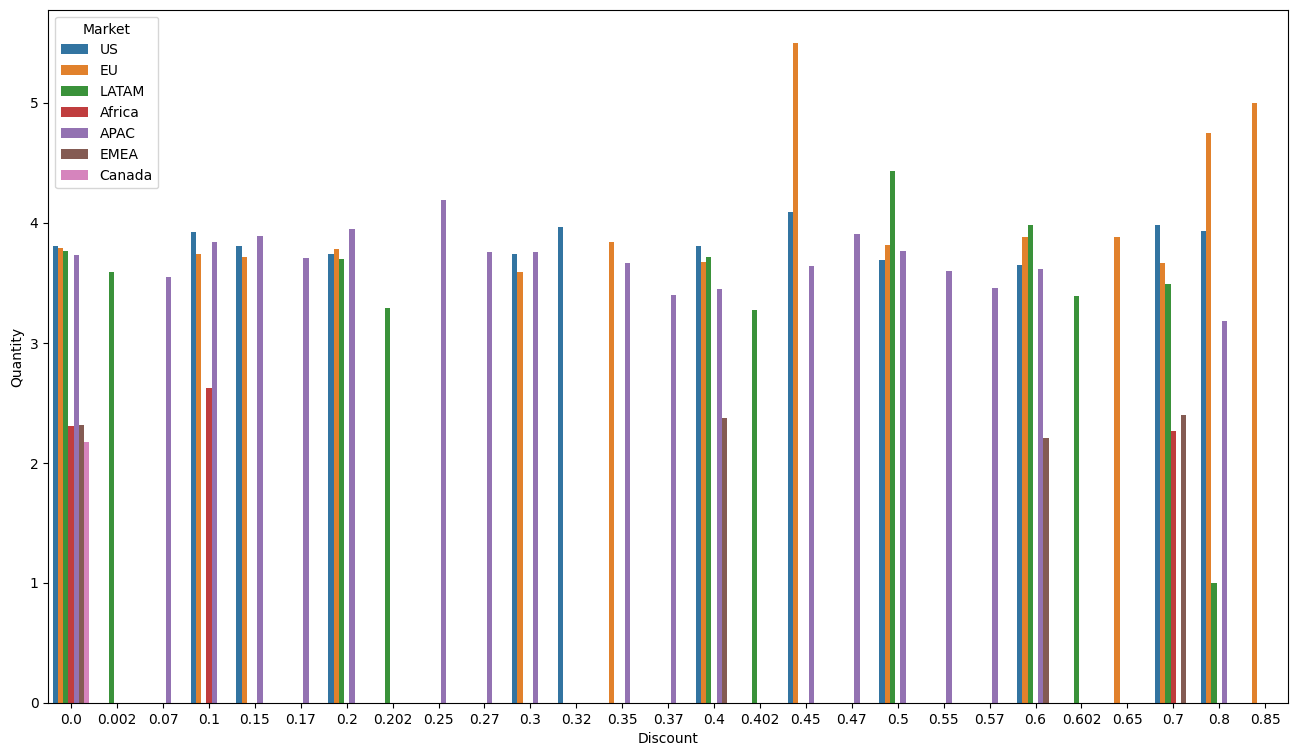

In [36]:
#특정 지역 별로 나눠 분석
plt.figure(figsize=(16,9))
sns.barplot(data=df, x='Discount', y='Quantity', hue='Market', ci=None)

<ipython-input-38-e86af7d23bc7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Discount', y='Quantity', hue='Market2', ci=None)


<Axes: xlabel='Discount', ylabel='Quantity'>

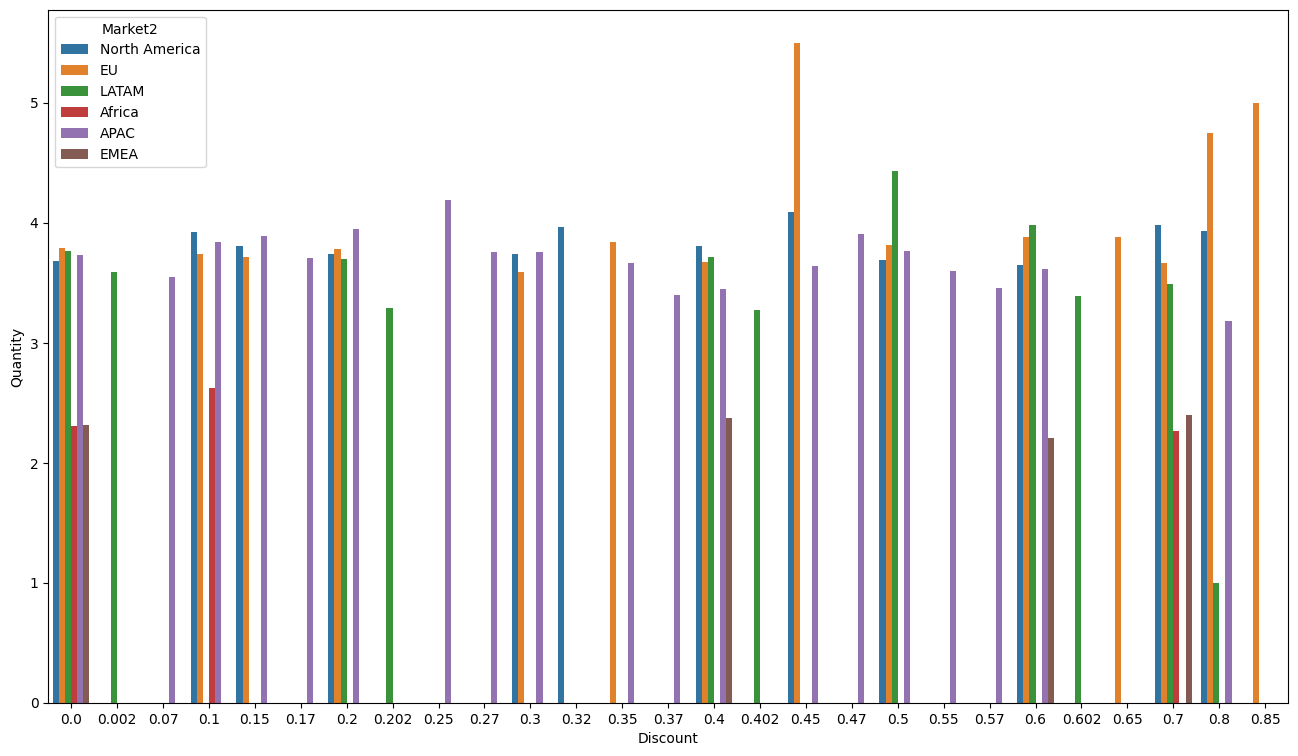

In [38]:
plt.figure(figsize=(16,9))
sns.barplot(data=df, x='Discount', y='Quantity', hue='Market2', ci=None)

<ipython-input-39-48db82f62d52>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Discount', y='Quantity', hue='Segment', ci=None)


<Axes: xlabel='Discount', ylabel='Quantity'>

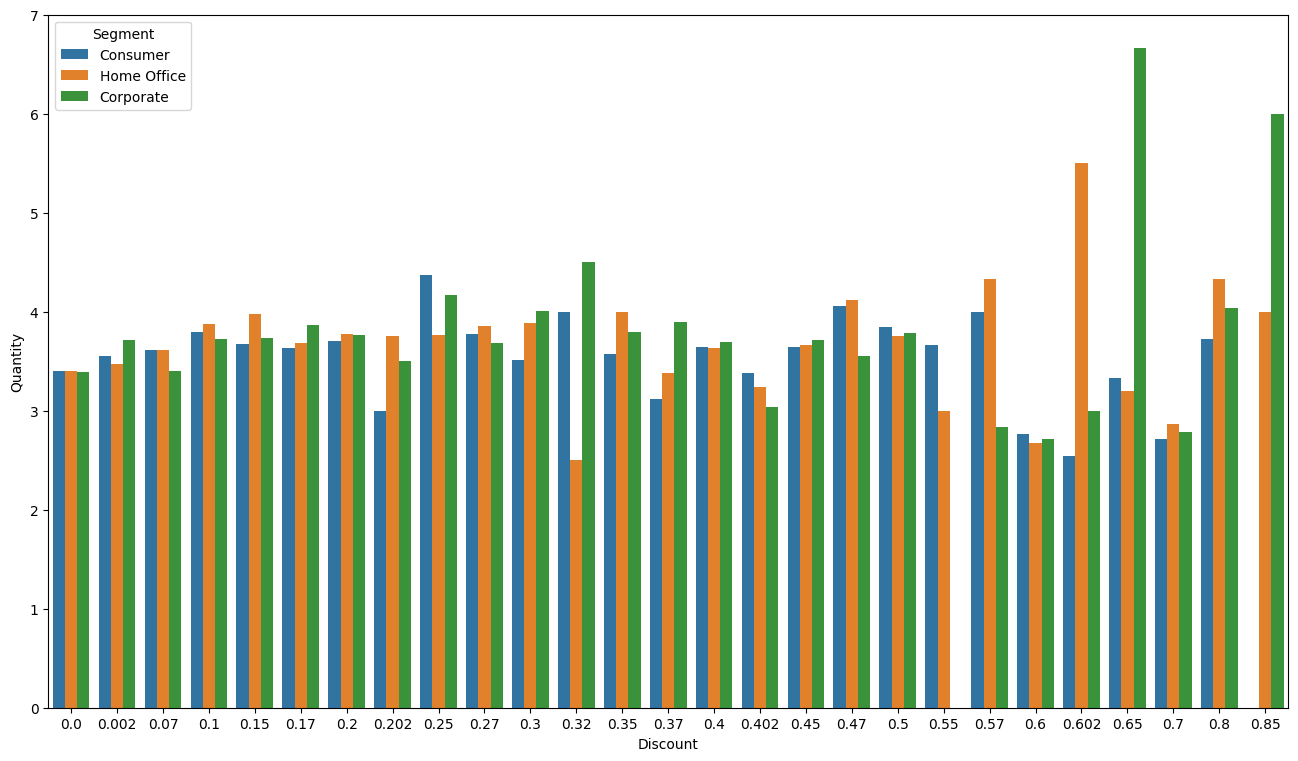

In [39]:
#특정 고객별로 나눠 분석
plt.figure(figsize=(16,9))
sns.barplot(data=df, x='Discount', y='Quantity', hue='Segment', ci=None)

<ipython-input-40-ff9b358ac66b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Discount', y='Quantity', hue='Year', ci=None)


<Axes: xlabel='Discount', ylabel='Quantity'>

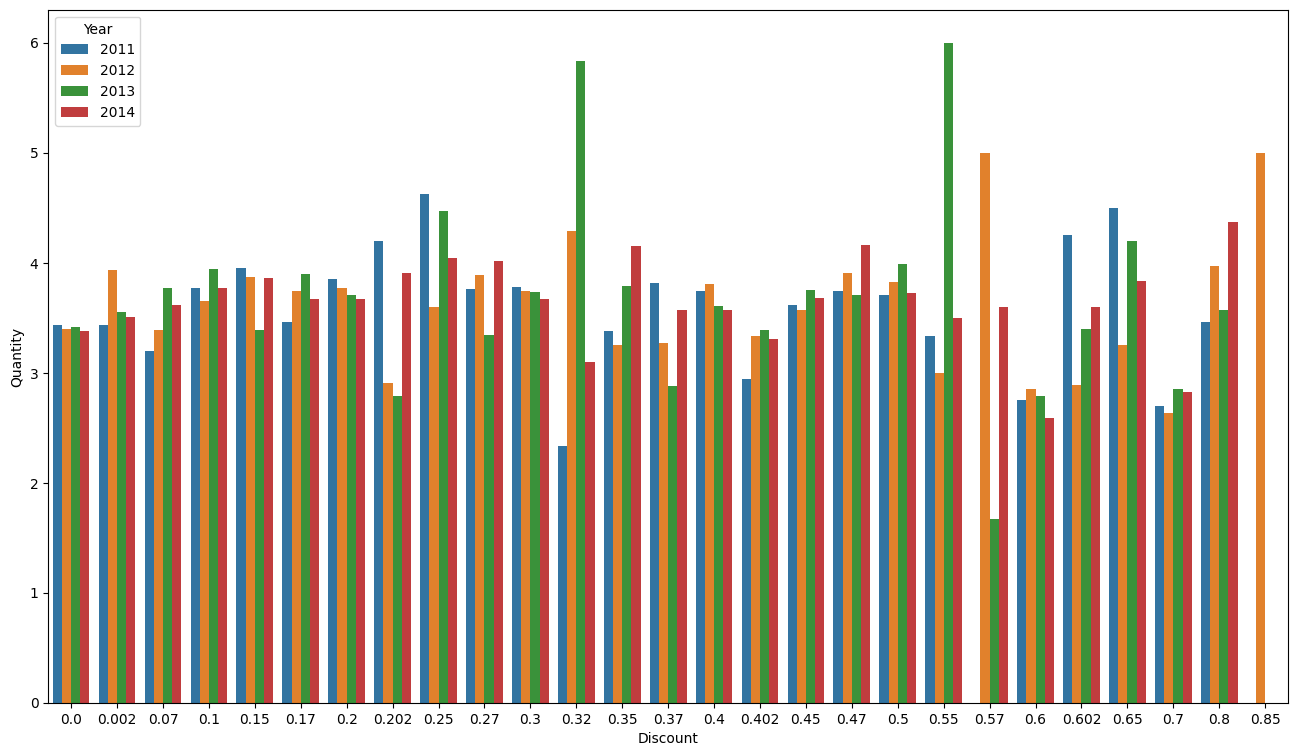

In [40]:
#특정 연도별로 나눠 분석
plt.figure(figsize=(16,9))
sns.barplot(data=df, x='Discount', y='Quantity', hue='Year', ci=None)

### 2. Order.Priority와 Quantity 관계 분석

<ipython-input-61-7fad7575487b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order.Priority', y='Quantity', ci=None)
<ipython-input-61-7fad7575487b>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Category', ci=None)
<ipython-input-61-7fad7575487b>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Market', ci=None)
<ipython-input-61-7fad7575487b>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Segment', ci=None)
<ipython-input-61-7fad7575487b>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Order.Priority', y='Qu

<Axes: xlabel='Order.Priority', ylabel='Quantity'>

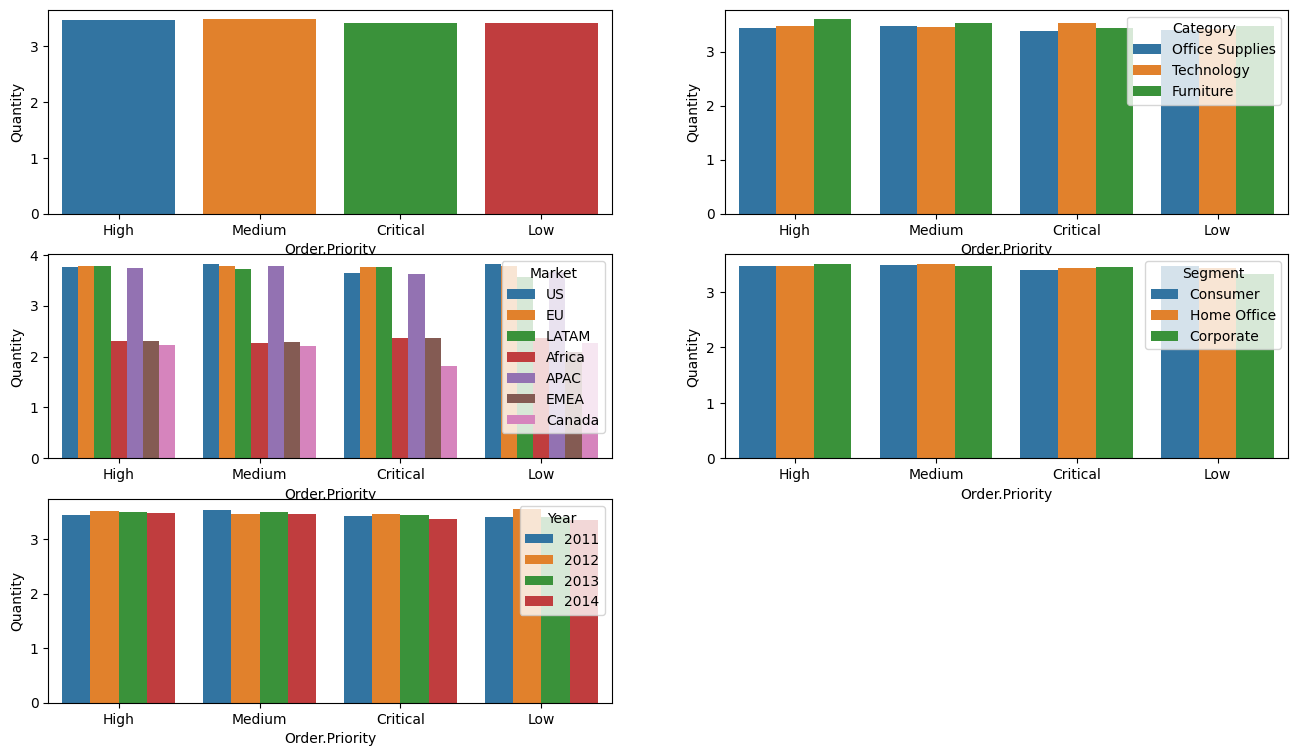

In [61]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
sns.barplot(data=df, x='Order.Priority', y='Quantity', ci=None)

plt.subplot(322)
sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Category', ci=None)

plt.subplot(323)
sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Market', ci=None)

plt.subplot(324)
sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Segment', ci=None)

plt.subplot(325)
sns.barplot(data=df, x='Order.Priority', y='Quantity', hue='Year', ci=None)

### 3. Profit과 Quantity 관계 분석

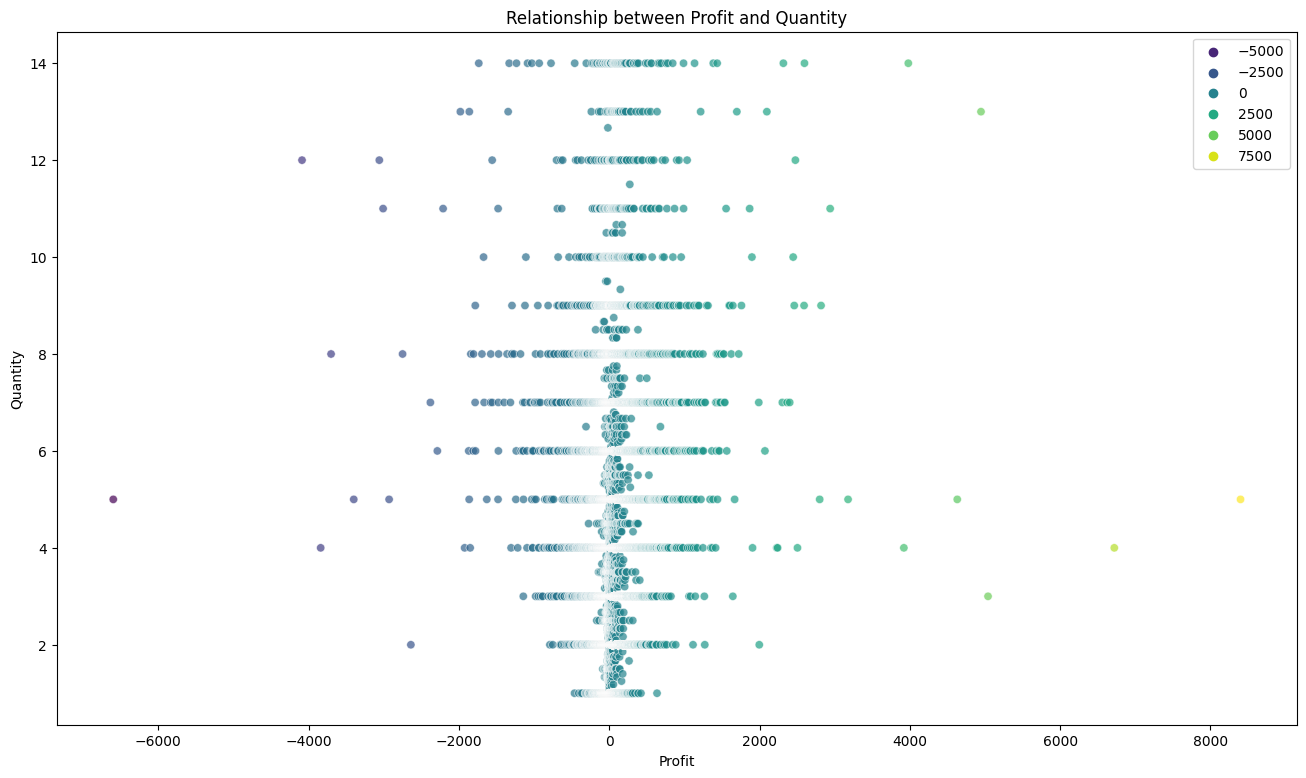

In [48]:
# Profit별 Quantity의 평균 계산
df_profit_quantity = df.groupby('Profit').agg({'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_profit_quantity, x='Profit', y='Quantity', hue='Profit', palette='viridis', alpha=0.7)
plt.title('Relationship between Profit and Quantity')
plt.legend()
plt.show()

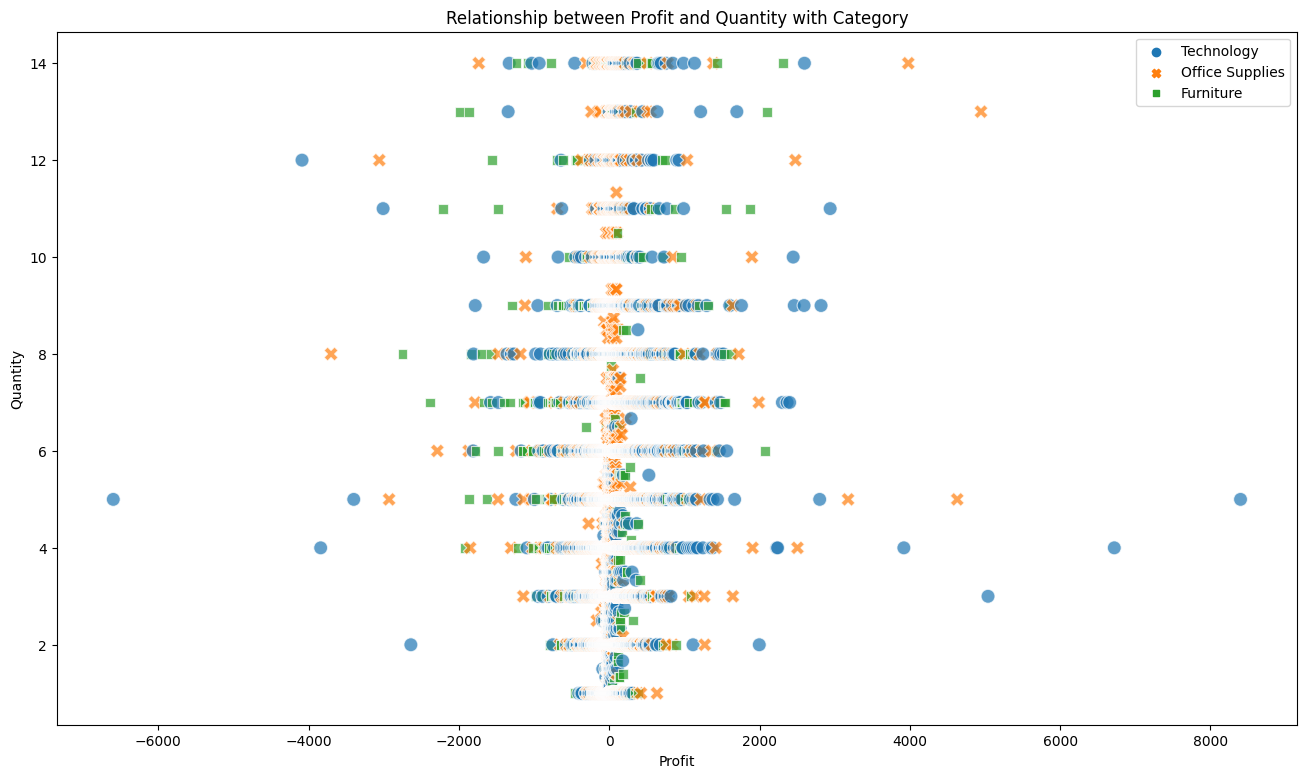

In [56]:
df_profit_quantity2 = df.groupby(['Profit', 'Category']).agg({'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_profit_quantity2, x='Profit', y='Quantity', hue='Category', style='Category', alpha=0.7, s=100)
plt.title('Relationship between Profit and Quantity with Category')
plt.legend()
plt.show()

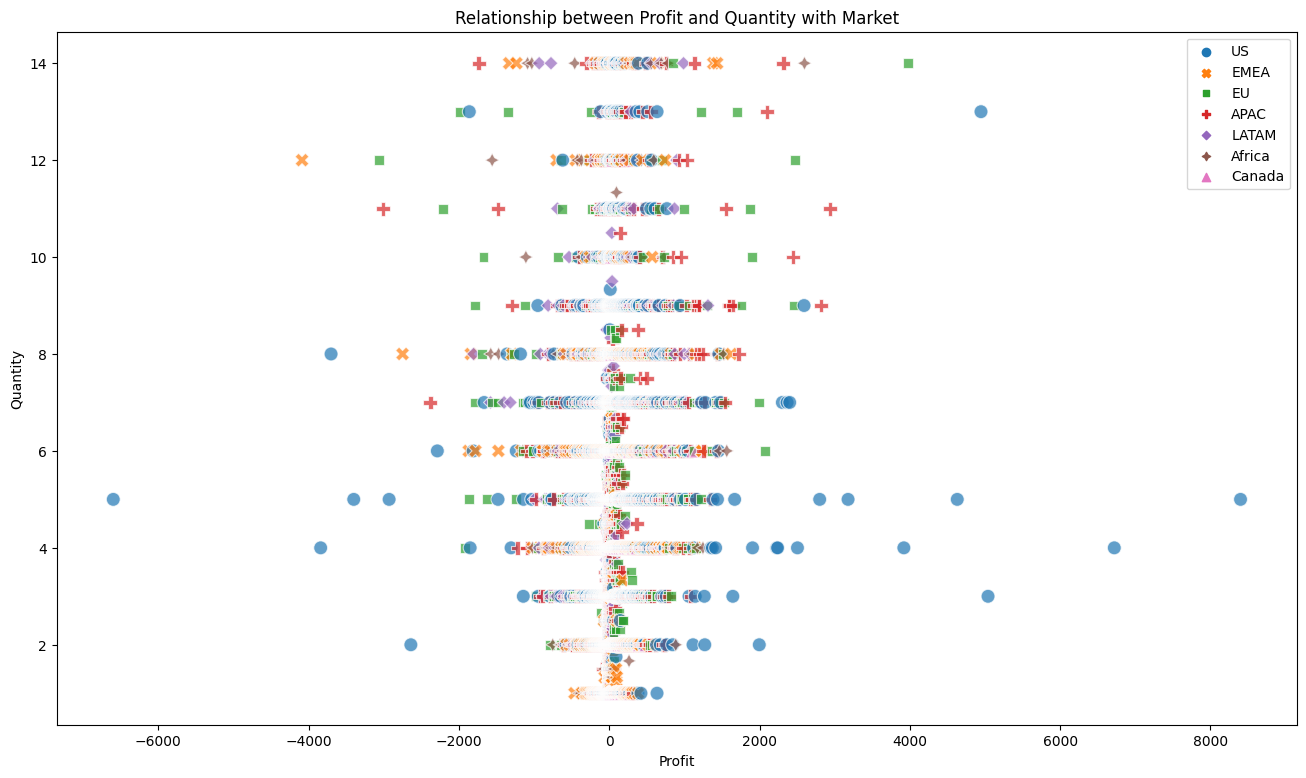

In [57]:
df_profit_quantity3 = df.groupby(['Profit', 'Market']).agg({'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_profit_quantity3, x='Profit', y='Quantity', hue='Market', style='Market', alpha=0.7, s=100)
plt.title('Relationship between Profit and Quantity with Market')
plt.legend()
plt.show()

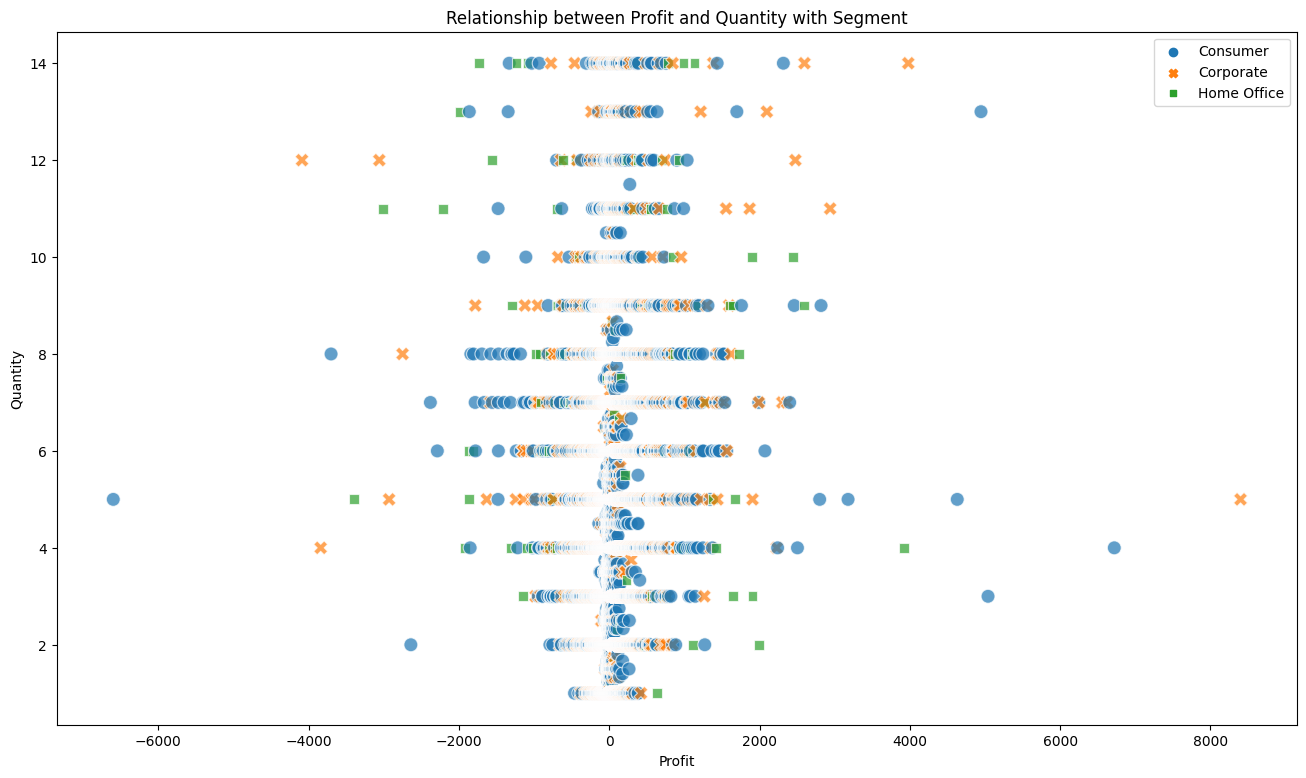

In [58]:
df_profit_quantity4 = df.groupby(['Profit', 'Segment']).agg({'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_profit_quantity4, x='Profit', y='Quantity', hue='Segment', style='Segment', alpha=0.7, s=100)
plt.title('Relationship between Profit and Quantity with Segment')
plt.legend()
plt.show()

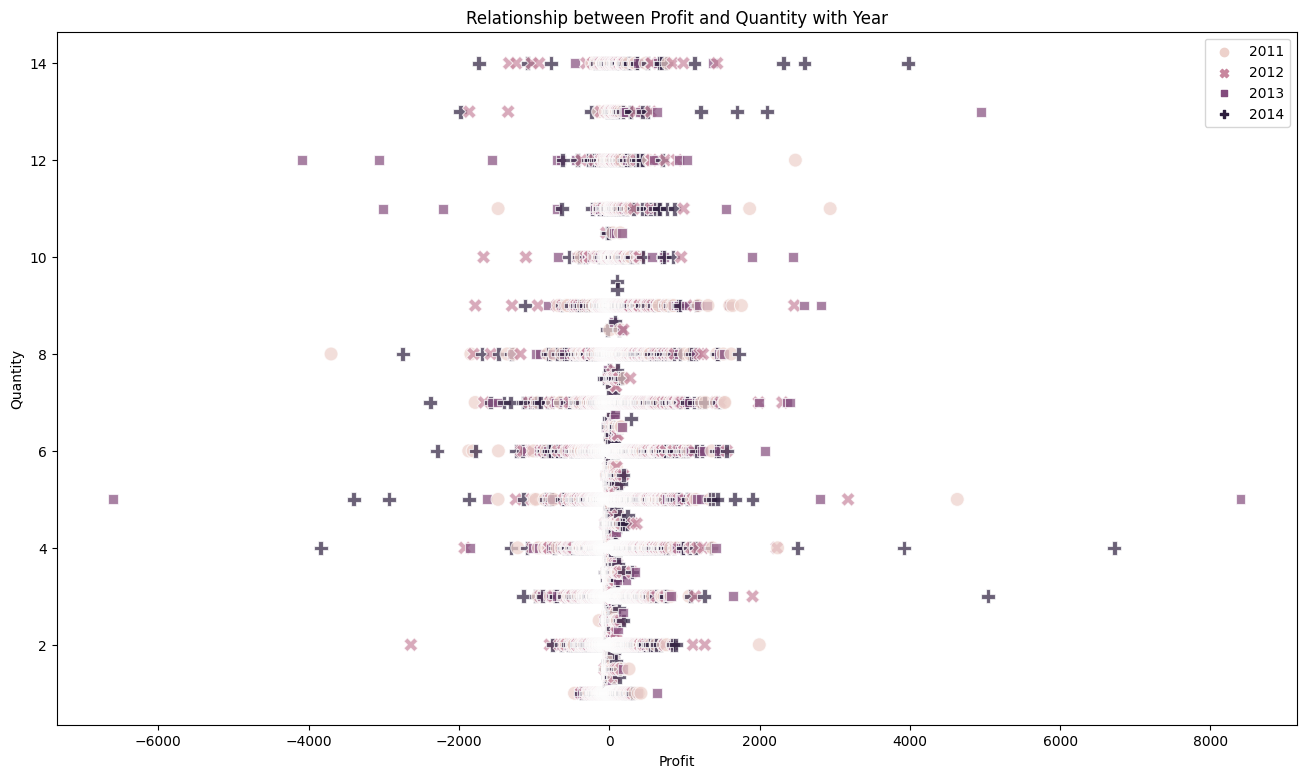

In [59]:
df_profit_quantity5 = df.groupby(['Profit', 'Year']).agg({'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_profit_quantity5, x='Profit', y='Quantity', hue='Year', style='Year', alpha=0.7, s=100)
plt.title('Relationship between Profit and Quantity with Year')
plt.legend()
plt.show()

### 4. Shipping.Cost와 Quantity 관계 분석

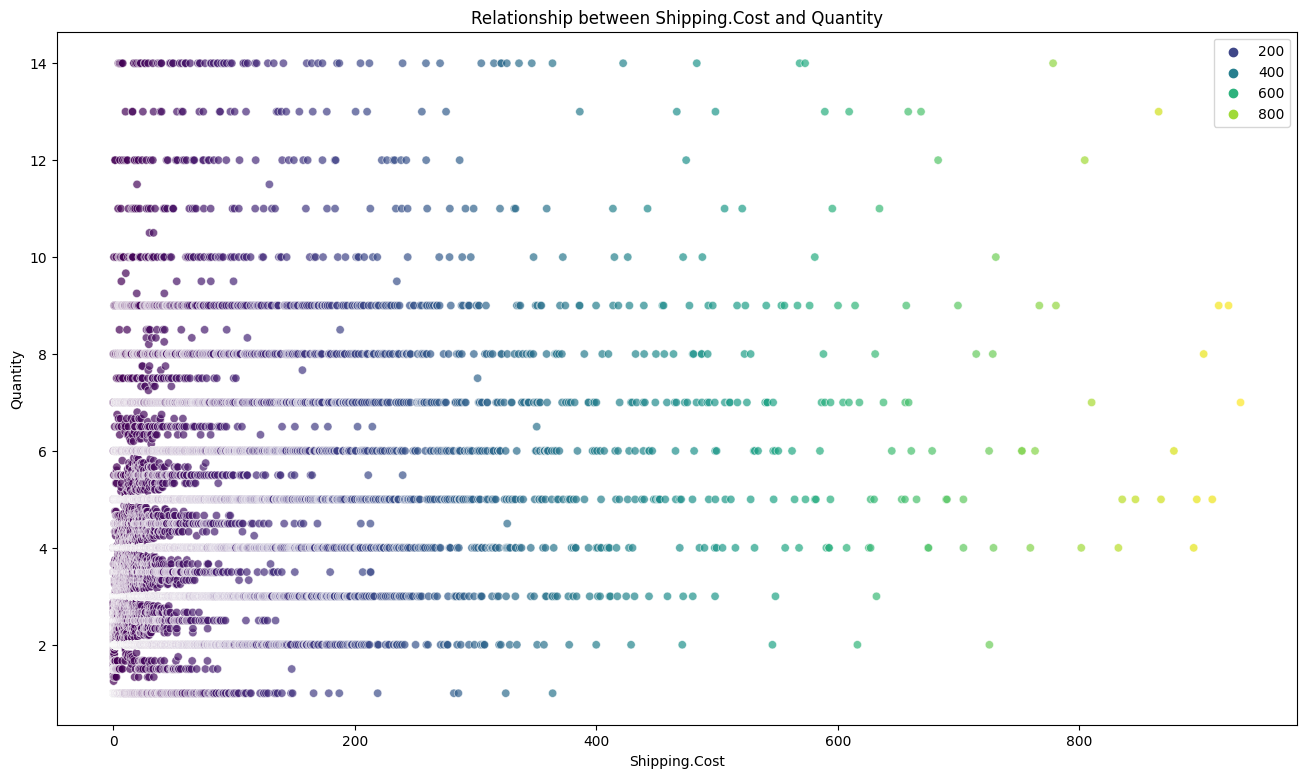

In [49]:
# Shipping.Cost별 Quantity의 평균 계산
df_sc_quantity = df.groupby('Shipping.Cost').agg({'Quantity': 'mean'}).reset_index()

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_sc_quantity, x='Shipping.Cost', y='Quantity', hue='Shipping.Cost', palette='viridis', alpha=0.7)
plt.title('Relationship between Shipping.Cost and Quantity')
plt.legend()
plt.show()

### 5. watingDay와 Quantity 관계 분석

<ipython-input-60-695cbd112bd9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='waitingDay', y='Quantity', ci=None)
<ipython-input-60-695cbd112bd9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Category', ci=None)
<ipython-input-60-695cbd112bd9>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Market', ci=None)
<ipython-input-60-695cbd112bd9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Segment', ci=None)
<ipython-input-60-695cbd112bd9>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Year',

<Axes: xlabel='waitingDay', ylabel='Quantity'>

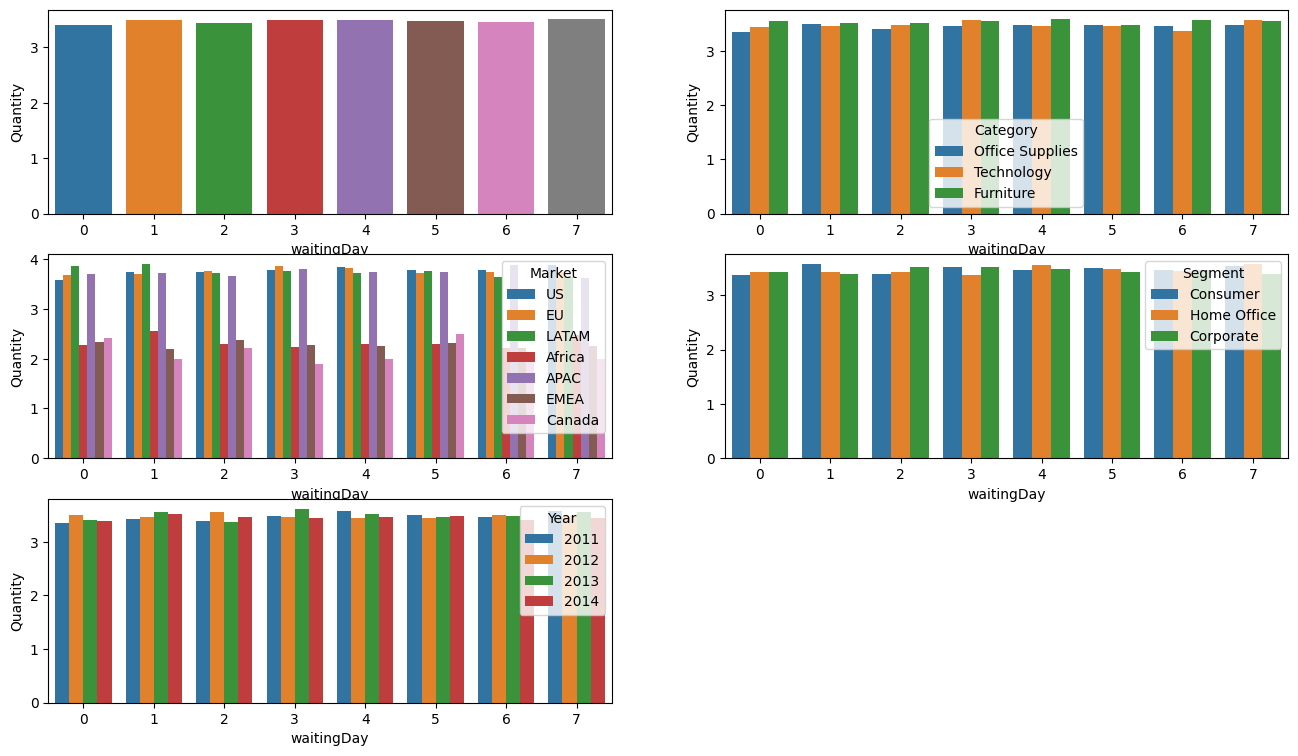

In [60]:
plt.figure(figsize=(16, 9))

plt.subplot(321)
sns.barplot(data=df, x='waitingDay', y='Quantity', ci=None)

plt.subplot(322)
sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Category', ci=None)

plt.subplot(323)
sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Market', ci=None)

plt.subplot(324)
sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Segment', ci=None)

plt.subplot(325)
sns.barplot(data=df, x='waitingDay', y='Quantity', hue='Year', ci=None)

##결론
1. Discount가 최대일 때 제품 판매량이 가장 높긴 했지만, 예상 외로 할인율과 판매율 간의 뚜렷한 상관관계는 보이지 않았다. 인기가 없는 제품일수록 할인율을 높여 판매하기 때문일 것으로 추측한다.
2. 예상: 판매자 관점에서 더 시급히 처리해야 할 주문일수록 소비자가 빨리 받아야 할 물건이다. 소비자는 같은 제품에 대해 판매처가 여러 곳 있다면, 주문을 더 시급히 처리하는 판매자에게 주문할 것이다.  
실제: 주문의 우선 순위가 판매율에 영향을 미치지 못했다.
3. 예상: 주문에서 발생한 수익이 낮다는 것은, 판매자 입장에서 마진이 남지 않고 제품의 판매가가 제품의 원가와 차이가 없다는 것을 의미한다. 즉, 제품의 판매가가 낮아 사람들이 제품을 많이 구매할 것이다.  
실제: Profit과 Quantity는 상관관계가 없었다.
4. 예상: 주문에 대한 배송 비용이 많이 들면 많이 드는 만큼 제품의 판매가를 비싸게 설정해 소비자의 구매 욕구를 떨어트릴 수 있다.  
실제: 예상대로 Shipping.Cost가 적을수록 많은 제품이 판매되었다.  
5. 예상: 소비자는 같은 물건에 대해 판매처가 여러 곳 있다면, 배송 기간이 짧은 제품을 판매하는 판매자의 상품을 구매할 것이다.  
실제: waitingDay와 Quantity는 상관관계가 없었다.

##해결 방법

판매율을 증가시키기 위해, 주문에 대한 배송 비용을 줄여야 한다.  
전반적인 배송 시스템을 수정하거나, 이미 뛰어난 배송 시스템을 갖춘 기업을 인수하여 주문에 대한 배송 비용을 줄일 수 있다.

<ipython-input-72-4af01c194be0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='Ship.Mode',y='Quantity', ci=None)


<Axes: xlabel='Ship.Mode', ylabel='Quantity'>

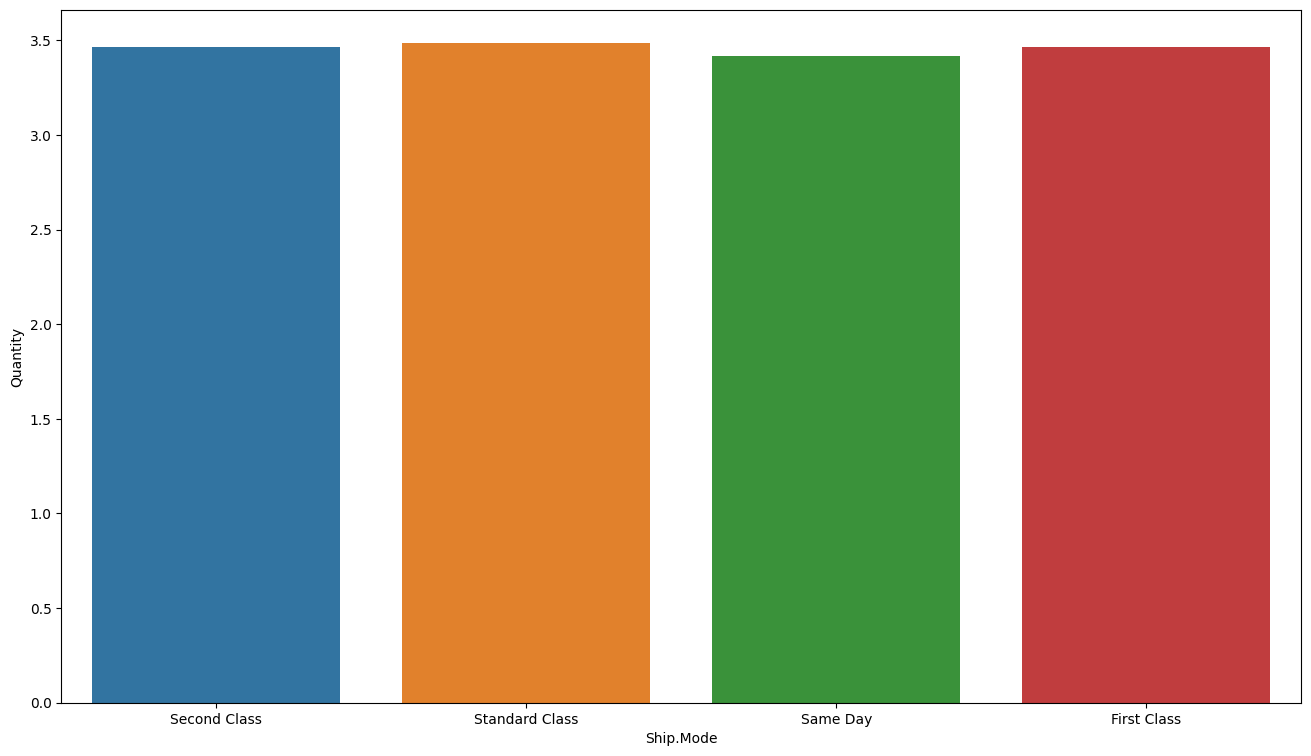

In [72]:
#번외
plt.figure(figsize=(16,9))
sns.barplot(data=df,x='Ship.Mode',y='Quantity', ci=None)

## 추가 분석(번외)
목표를 판매율 증가가 아닌, 매출 증가로 변경해 본다.

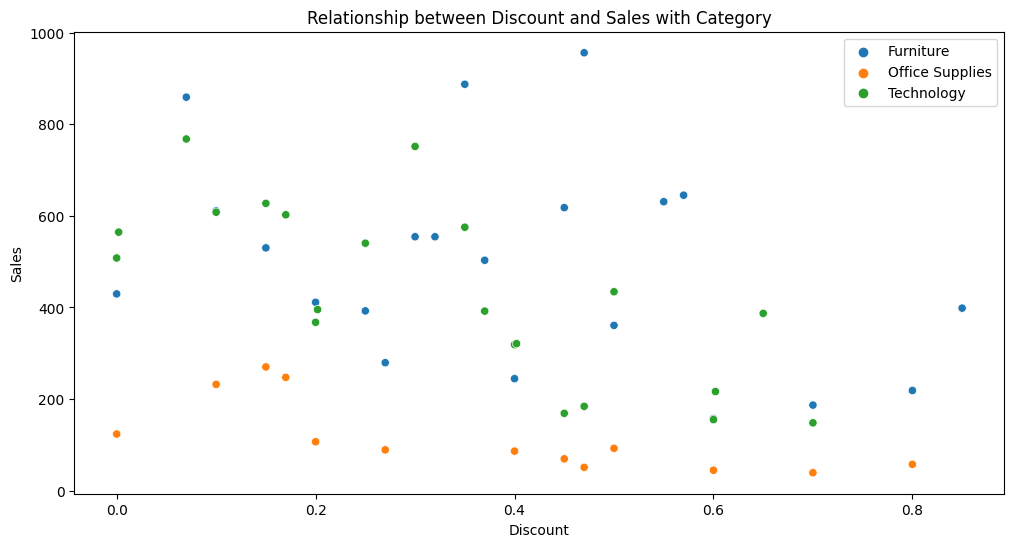

In [65]:
#카테고리별 매출 평균 값과 Discount 관계 분석
df_category_sales = df.groupby(['Category', 'Discount']).agg({'Sales': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_category_sales, x='Discount', y='Sales', hue='Category')
plt.title('Relationship between Discount and Sales with Category')
plt.legend()
plt.show()

Office Supplies 품목은 매출 증가에 도움이 되지 않는다.

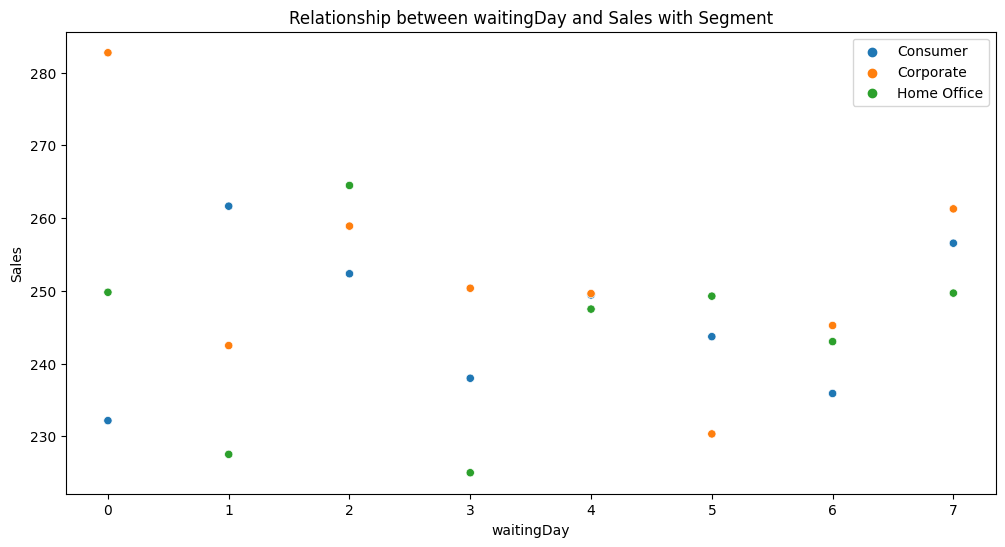

In [68]:
#고객별 매출 평균 값과 waitingDay 관계 분석
df_category_sales = df.groupby(['Segment', 'waitingDay']).agg({'Sales': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_category_sales, x='waitingDay', y='Sales', hue='Segment')
plt.title('Relationship between waitingDay and Sales with Segment')
plt.legend()
plt.show()

<ipython-input-69-8c5a9583041d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='Market',y='Sales', ci=None)


<Axes: xlabel='Market', ylabel='Sales'>

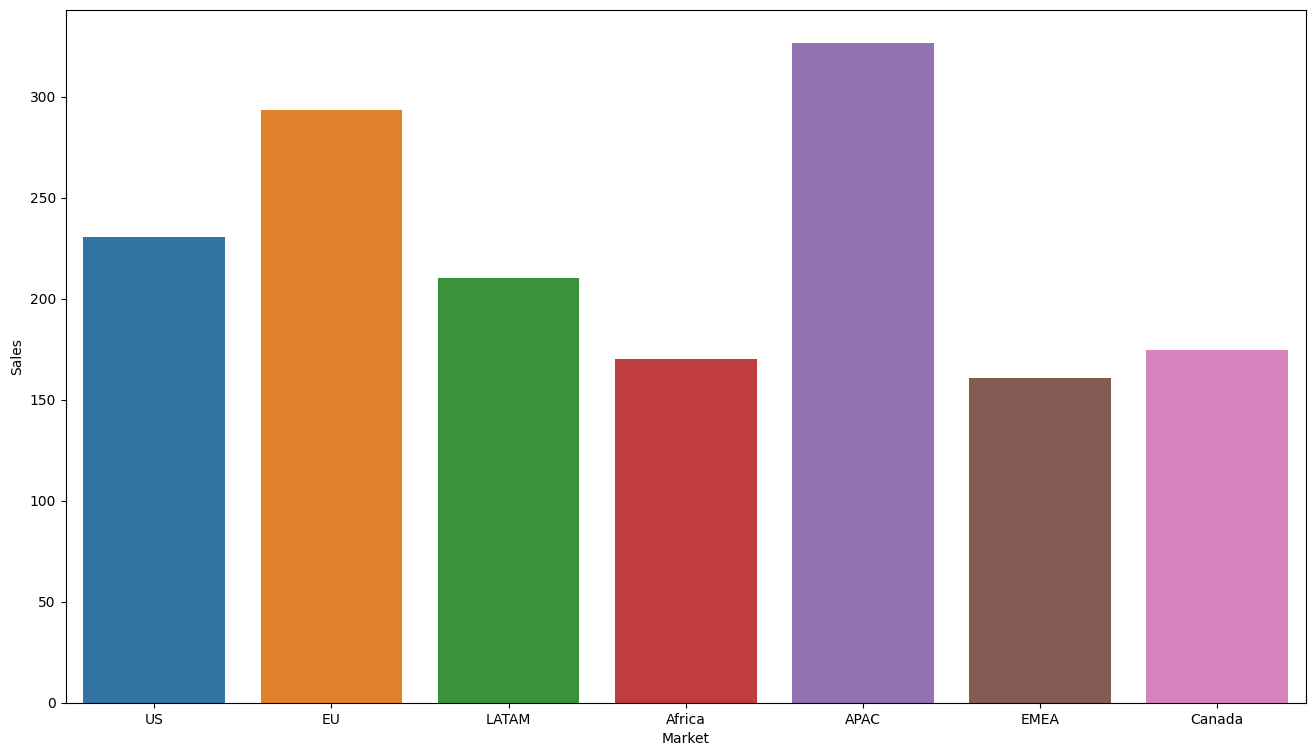

In [69]:
plt.figure(figsize=(16,9))
sns.barplot(data=df,x='Market',y='Sales', ci=None)

슈퍼스토어가 운영되는 지역이 APAC인 곳은 매출 증가에 크게 기여하고, Africa Market, EMEA, Canada 지역은 그렇지 못하다.

<ipython-input-70-a0f8eb04089e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='weeknum', y='Sales', hue='Category', ci=None)


<Axes: xlabel='weeknum', ylabel='Sales'>

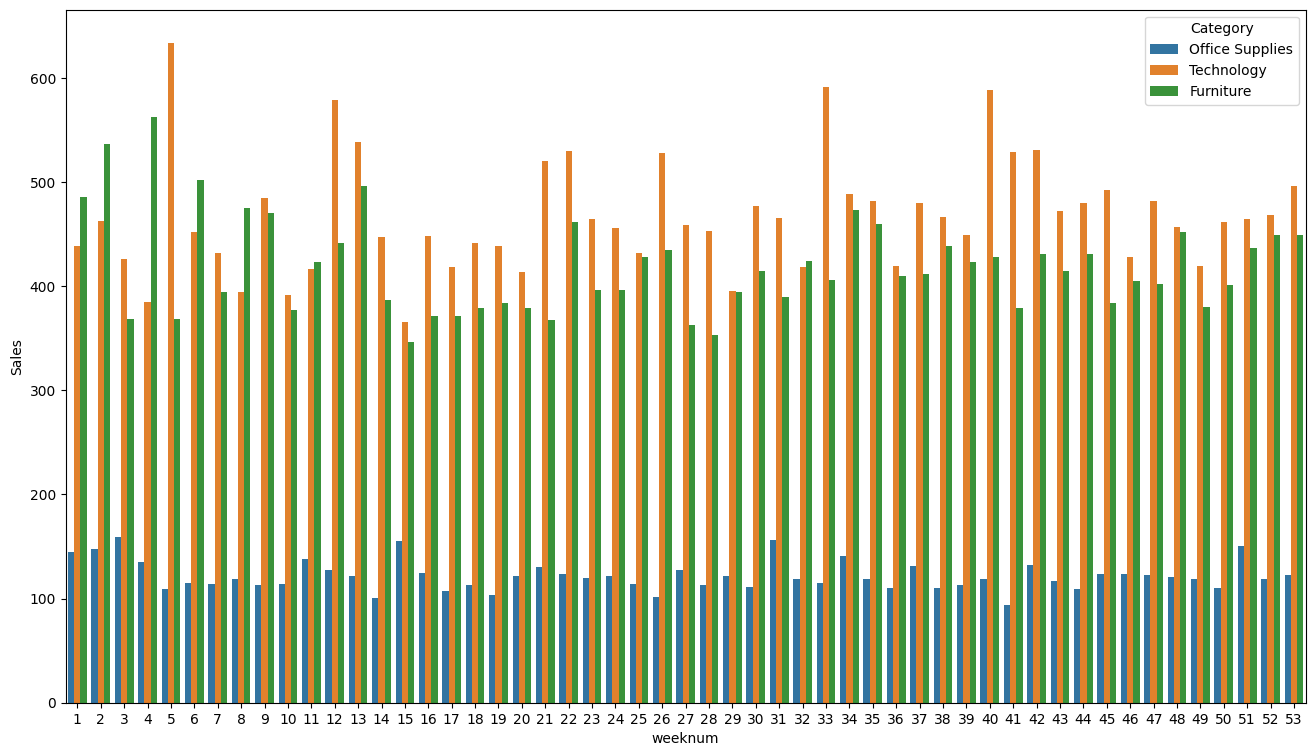

In [70]:
plt.figure(figsize=(16,9))
sns.barplot(data=df,x='weeknum', y='Sales', hue='Category', ci=None)

특정 기간에 매출이 증가하거나 감소하는 경향은 없다.

결론(번외): 매출 증가 기여도가 낮은 품목 혹은 지역을 개선하거나, 정리하여 매출 증가 기여도가 높은 품목 혹은 지역에 집중하고 비용을 절약한다.